#MNIST Image Classification using Multilayer Perceptron (MLP)

<b>Description:</b><br/>
In this Jupyter notebook, we will delve into the fundamental task of image classification using the MNIST dataset.

The MNIST dataset consists of 28x28 grayscale images of handwritten digits (0 through 9) and is a widely used benchmark in the field of machine learning.

<b>Objective:</b><br/>
Our primary objective is to train a Multilayer Perceptron (MLP) model to accurately classify these handwritten digits.

#Data Loading and Exploration

In [1]:
#Importing important libraries like numpy, tensorflow, matplotlib
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [52]:
#Loading the data MNIST dataset, Sequential model, Dense layer
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

#Libraries used for reguralization
from keras.layers import Dropout

In [3]:
#mnist.load_data returns two tuples for both training and test data
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


### Normalization
This normalization ensures that the input features, representing the grayscale intensity of each pixel, are standardized across the dataset.  
Normalization is a crucial step to enhance the stability and convergence of our Multilayer Perceptron (MLP) model during training, <b>facilitating more effective learning of patterns and features within the images.</b>

In [4]:
#we normalize the pixel values of the images in the MNIST dataset.
xtrain, xtest = xtrain / 255.0, xtest / 255.0

In [5]:
print("x-train:",xtrain.shape)
print("x-test:",xtest.shape)
print("y-train:",ytrain.shape)
print("y-test:",ytest.shape)

x-train: (60000, 28, 28)
x-test: (10000, 28, 28)
y-train: (60000,)
y-test: (10000,)


### Building the Multilayer Perceptron (MLP) Model

In this section, we construct a sequential neural network model for image classification using the MNIST dataset. The architecture consists of densely connected layers, forming a Multilayer Perceptron.   
<b>Hidden layers:</b> We stack multiple dense layers with appropriate activation functions to capture complex relationships within the data.  
<b>Output layer:</b> The final layer uses the <b>softmax activation,</b> facilitating the model's output as probabilities across the different classes (digits 0 through 9).  
This architecture is designed to learn and generalize patterns from the normalized pixel values, paving the way for effective digit recognition.


In [6]:
model = Sequential()
input_dim = 28*28
output_dim = 10
model.add(Dense(units=64, activation='relu', input_dim=input_dim))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=output_dim, activation='softmax'))

### Compiling the Model and Configuring Training Parameters

Before training the model, we compile it by specifying the optimizer, loss function, and evaluation metric. In this project, we use the <b>Adam optimizer, </b>a popular choice for its adaptive learning rate capabilities. Other commonly used optimizers include SGD (Stochastic Gradient Descent) and RMSprop.

The chosen loss function is **'Sparse Categorical Crossentropy,'** suitable for multi-class classification tasks like digit recognition. It calculates the cross-entropy loss between the predicted probabilities and the true class labels, efficiently handling cases where each instance belongs to a single class. This loss function is well-suited for scenarios where the classes are mutually exclusive, as is the case with digit classification in the MNIST dataset.

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Flattening
Flattening the data is a preprocessing step in neural networks, particularly in Multilayer Perceptron (MLP) models.  
It involves converting multidimensional input, such as images represented as 2D or 3D arrays, into a one-dimensional vector.

In [8]:
xtrain_flattened = xtrain.reshape((60000,28*28))

In [9]:
print("Before Flattening:",xtrain.shape)
print("After Flattening:",xtrain_flattened.shape)

Before Flattening: (60000, 28, 28)
After Flattening: (60000, 784)


### Training the Model using `model.fit()`

The `model.fit()` method is used to train the Multilayer Perceptron (MLP) model on the provided dataset. Key parameters include:

- **Training Data (`xtrain`):** The input data used for training the model.
- **Training Labels (`ytrain`):** The corresponding labels or target values for the training data.
- **Epochs:** The number of times the model iterates over the entire training dataset during training.
- **Batch Size:** The number of samples processed before updating the model's weights, aiding in efficient memory usage.
- **Validation Split:** The proportion of training data to set aside for validation, typically a percentage between 0 and 1. For instance, `validation_split=0.2` allocates 20% of the training data for validation.
- **Callbacks:** Custom functions that can be invoked at various training stages, facilitating dynamic adjustments or logging.


In [10]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [11]:
h=model.fit(xtrain_flattened, ytrain, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3219 - accuracy: 0.9038 - val_loss: 0.1801 - val_accuracy: 0.9464
Epoch 2/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1434 - accuracy: 0.9573 - val_loss: 0.1288 - val_accuracy: 0.9628
Epoch 3/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1044 - accuracy: 0.9680 - val_loss: 0.1132 - val_accuracy: 0.9668
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0817 - accuracy: 0.9751 - val_loss: 0.1169 - val_accuracy: 0.9661
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0670 - accuracy: 0.9798 - val_loss: 0.1084 - val_accuracy: 0.9686
Epoch 6/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0559 - accuracy: 0.9824 - val_loss: 0.1093 - val_accuracy: 0.9678
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0470 - accuracy: 0.9849 - val_loss: 0.1090 - val_accurac

In [12]:
training_loss=h.history['loss']
validation_loss=h.history['val_loss']
epochs = range(1, len(training_loss) + 1)

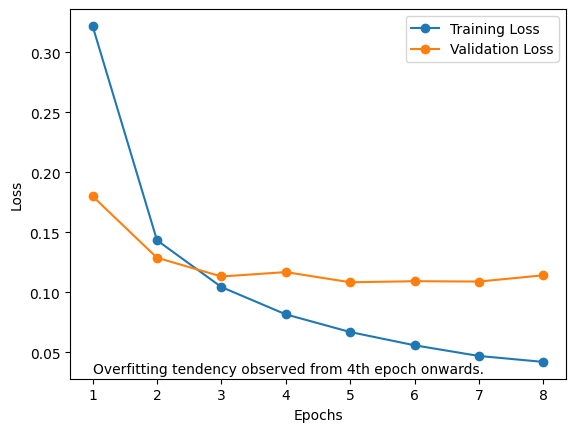

In [38]:
plt.plot(epochs,training_loss,marker='o',label="Training Loss")
plt.plot(epochs,validation_loss,marker='o',label="Validation Loss")
deviation_text = 'Overfitting tendency observed from 4th epoch onwards.'
plt.text(epochs[0], min(min(training_loss), min(validation_loss)), deviation_text, verticalalignment='top', horizontalalignment='left')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

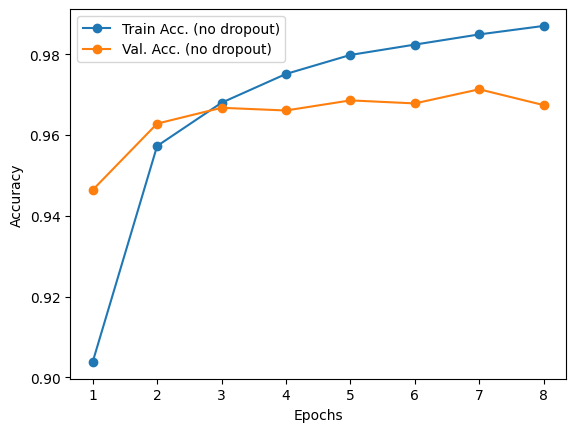

In [47]:
traning_accuracy_withoutdropout=h.history['accuracy']
validation_accuracy_withoutdropout=h.history['val_accuracy']
epochs = range(1, len(traning_accuracy_withoutdropout) + 1)
plt.plot(epochs,traning_accuracy_withoutdropout,marker='o',label="Train Acc. (no dropout)")
plt.plot(epochs,validation_accuracy_withoutdropout,marker='o',label="Val. Acc. (no dropout)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

<b>Overfitting:</b>
Overfitting occurs when a machine learning model learns the training data too well, capturing noise and specificities, hindering its ability to generalize to new, unseen data.

<b>Dropout:</b>
Dropout is a regularization technique in neural networks that randomly deactivates a fraction of neurons during training, preventing over-reliance on specific neurons and improving generalization.

In [54]:
'''Adding Dropout to the model to reduce the possible over fitting'''
model2 = Sequential()
input_dim = 28*28
output_dim = 10
model2.add(Dense(units=64, activation='relu', input_dim=input_dim))
model2.add(Dropout(0.4))
model2.add(Dense(units=32, activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(units=output_dim, activation='softmax'))

In [55]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [56]:
h2=model2.fit(xtrain_flattened, ytrain, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 0.7224 - accuracy: 0.7715 - val_loss: 0.2356 - val_accuracy: 0.9333
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4144 - accuracy: 0.8823 - val_loss: 0.1951 - val_accuracy: 0.9455
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3585 - accuracy: 0.8974 - val_loss: 0.1752 - val_accuracy: 0.9524
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3205 - accuracy: 0.9079 - val_loss: 0.1578 - val_accuracy: 0.9578
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3072 - accuracy: 0.9129 - val_loss: 0.1571 - val_accuracy: 0.9546
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2916 - accuracy: 0.9178 - val_loss: 0.1436 - val_accuracy: 0.9628
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2783 - accuracy: 0.9200 - val_loss: 0.1405 - val_accuracy:

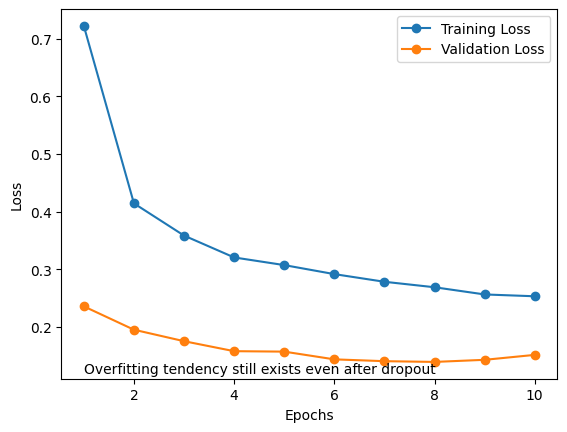

In [58]:
training_loss_dropout=h2.history['loss']
validation_loss_dropout=h2.history['val_loss']
epochs = range(1, len(training_loss_dropout) + 1)
plt.plot(epochs,training_loss_dropout,marker='o',label="Training Loss")
plt.plot(epochs,validation_loss_dropout,marker='o',label="Validation Loss")
deviation_text = 'Overfitting tendency still exists even after dropout'
plt.text(epochs[0], min(min(training_loss_dropout), min(validation_loss_dropout)), deviation_text, verticalalignment='top', horizontalalignment='left')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
64**2+64

4160

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model.predict(ytest)

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential' (type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer 'sequential' (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=uint8)
      • training=False
      • mask=None
